In [144]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
import argparse
import math
import cv2

In [145]:
def BRISK(img1, img2):
    gray_img1 = cv.cvtColor(img1, cv.COLOR_BGR2GRAY)
    gray_img2 = cv.cvtColor(img2, cv.COLOR_BGR2GRAY)    

    BRISK = cv.BRISK_create()
    keypoints1, descriptors1 = BRISK.detectAndCompute(img1, None)
    keypoints2, descriptors2 = BRISK.detectAndCompute(img2, None)
    
    return keypoints1, descriptors1, keypoints2, descriptors2


In [146]:
def brute_force_opencv_matcher(kps1, descs1, kps2, descs2,img1, img2):
    bf = cv.BFMatcher(cv.NORM_L1)
    matches = bf.knnMatch(descs1,descs2, k=2)

    good = []
    for m,n in matches:
        if m.distance < 0.75*n.distance:
            good.append([m])


    return cv.drawMatchesKnn(img1, kps1, img2, kps2, good[1:20], None, flags=2)


In [147]:
def matcher(kps1, descs1, kps2, descs2,img1, img2):
    matches = []
    for i, k1 in enumerate(descs1):
        for j, k2 in enumerate(descs2):
            matches.append(cv.DMatch(_distance=np.linalg.norm((k1 - k2), ord=1), _imgIdx=0, _queryIdx=i,_trainIdx=j))
            
    matches = sorted(matches, key = lambda x : x.distance)
    img3 = cv.drawMatches(img1, kps1, img2, kps2, matches[:20], None,
    flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
    plt.figure(figsize=(20,20))
    plt.imshow(img3) 
    plt.show()


In [148]:
tractor = cv.imread('t.jpeg')
tractor_forces = cv.imread('tv.jpeg')

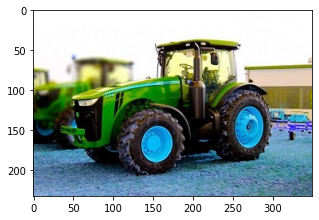

In [149]:
plt.figure(figsize=(5,5))
plt.imshow(tractor, cmap='gray')

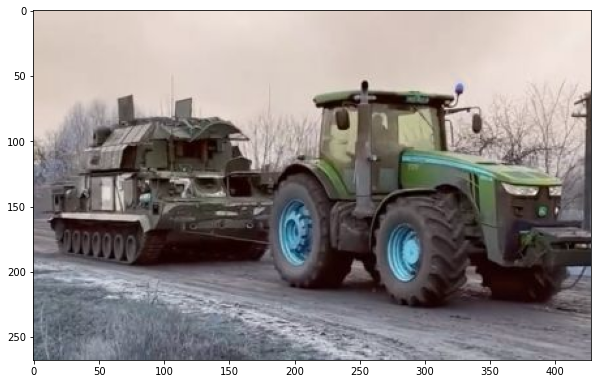

In [150]:
plt.figure(figsize=(10,10))
plt.imshow(tractor_forces, cmap='gray')

In [151]:
kps1, descs1, kps2, descs2 = BRISK(tractor, tractor_forces)

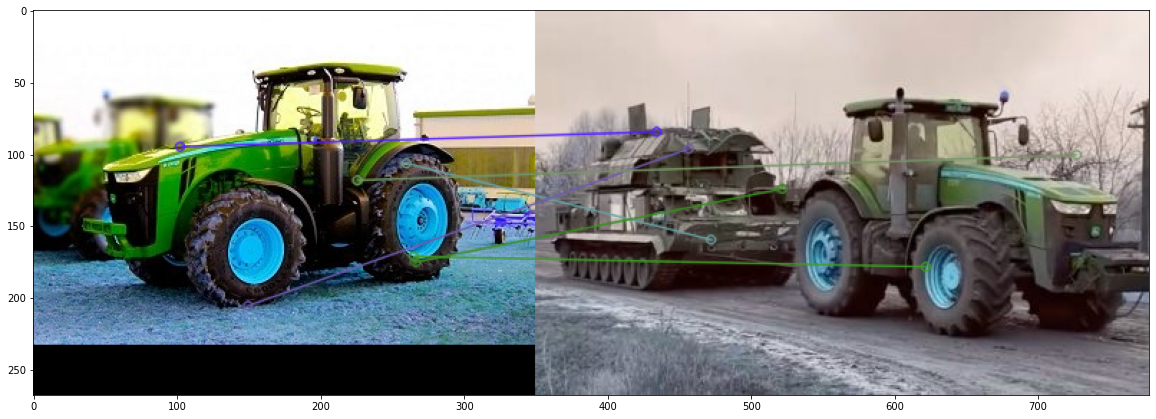

In [152]:
plt.figure(figsize=(20,20))
plt.imshow(brute_force_opencv_matcher(kps1, descs1, kps2, descs2, tractor, tractor_forces)) 
plt.show()

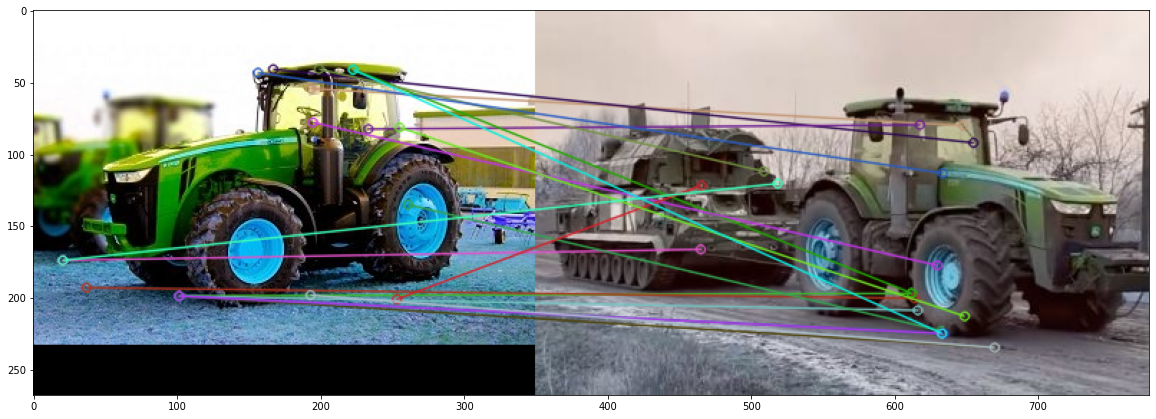

In [153]:
matcher(kps1, descs1, kps2, descs2, tractor, tractor_forces)

In [154]:
talking_head = cv.imread('luka2.jpg')
attack_on_Belarus = cv.imread('and now i.jpg')

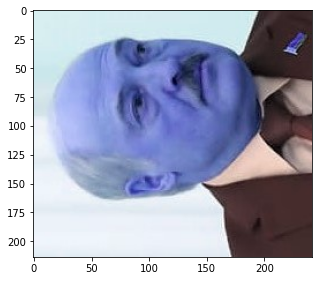

In [155]:
plt.figure(figsize=(5,5))
plt.imshow(talking_head)

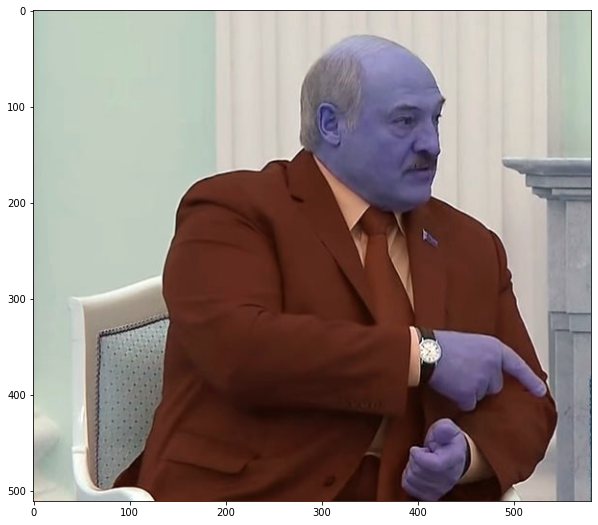

In [156]:
plt.figure(figsize=(10,10))
plt.imshow(attack_on_Belarus)

In [157]:
kps1_2, descs1_2, kps2_2, descs2_2 = BRISK(talking_head, attack_on_Belarus)

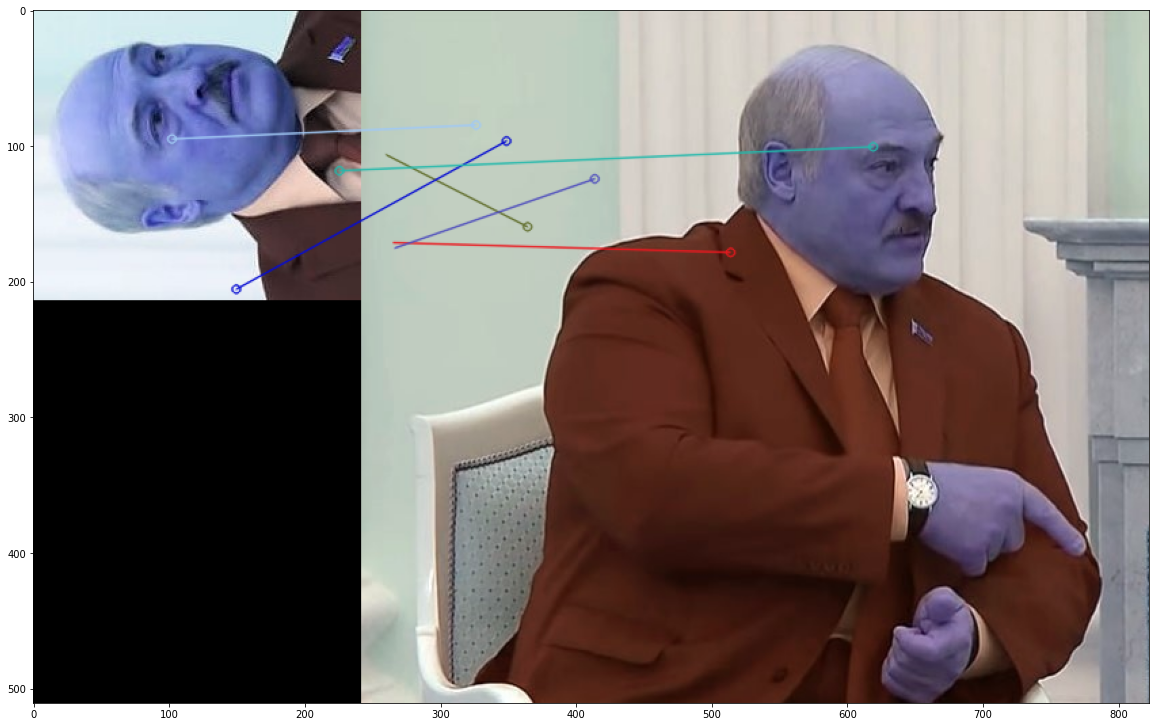

In [158]:
plt.figure(figsize=(20,20))
plt.imshow(brute_force_opencv_matcher(kps1, descs1, kps2, descs2, talking_head, attack_on_Belarus)) 
plt.show()

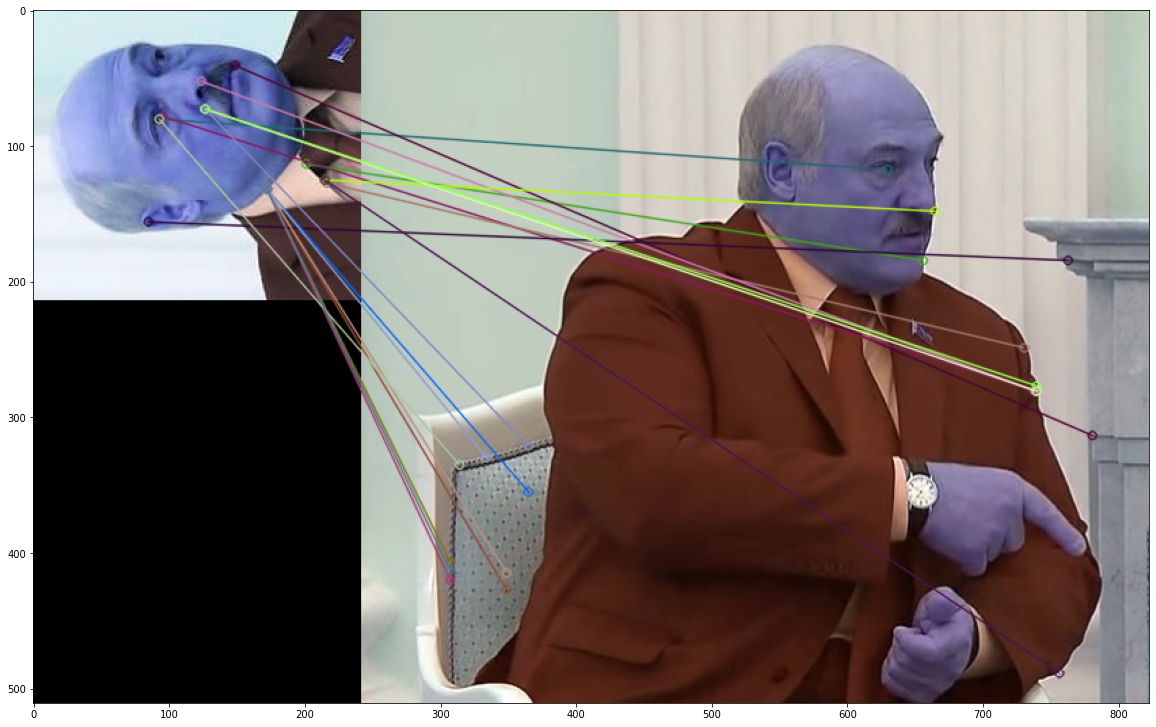

In [159]:
matcher(kps1_2, descs1_2, kps2_2, descs2_2,talking_head,attack_on_Belarus)